In [1]:
%reload_ext autoreload
%autoreload 2

# 导入所有的包
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import tensorflow as tf
import tensorflow.contrib.slim as slim

import os 
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']='0'



In [2]:
from PIL import Image

img1 = Image.open('/home/weijia.wu/workspace/TensorFlow/Tensorflow_Deeplearning/CNN/dataset/train/c0/img_12203.jpg')
img2 = Image.open('/home/weijia.wu/workspace/TensorFlow/Tensorflow_Deeplearning/CNN/dataset/train/c1/img_100021.jpg')
img3 = Image.open('/home/weijia.wu/workspace/TensorFlow/Tensorflow_Deeplearning/CNN/dataset/train/c2/img_100108.jpg')
img4 = Image.open('/home/weijia.wu/workspace/TensorFlow/Tensorflow_Deeplearning/CNN/dataset/train/c3/img_100006.jpg')

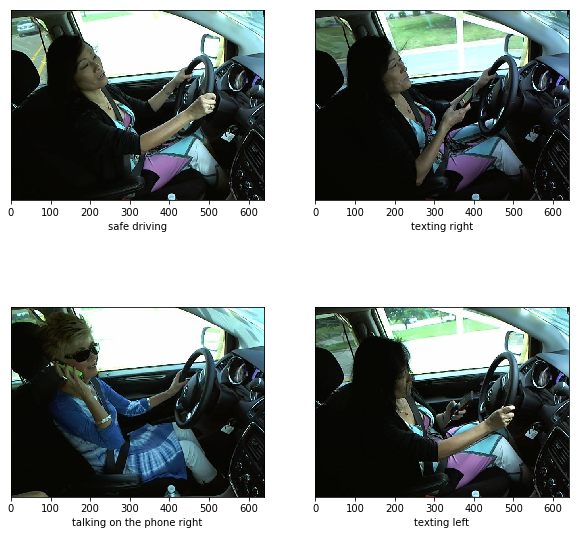

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 2
ncols = 2
figsize = (10, 10)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
figs[0, 0].imshow(img1)
figs[0, 0].axes.set_xlabel('safe driving')
figs[0, 0].axes.get_yaxis().set_visible(False)
figs[0, 1].imshow(img2)
figs[0, 1].axes.set_xlabel('texting right')
figs[0, 1].axes.get_yaxis().set_visible(False)
figs[1, 0].imshow(img3)
figs[1, 0].axes.set_xlabel('talking on the phone right')
figs[1, 0].axes.get_yaxis().set_visible(False)
figs[1, 1].imshow(img4)
figs[1, 1].axes.set_xlabel('texting left')
figs[1, 1].axes.get_yaxis().set_visible(False)

## 读入数据及预处理

接下来读入数据,用 tf.data 方法可以非常方便地操作

首先从`dataset/driver_imgs_list.csv`中读取图片路径以及标签列表

In [4]:
import os 
import csv
from imutils import paths
import random
def load_data_label(path):
    print('[INFO] loading images...')
    image_names = []
    image_labels = []
    
    imagePaths = sorted(list(paths.list_images(path)))
    random.seed(42)
    random.shuffle(imagePaths)
    for imagePath in imagePaths:
        imagePath = ''.join(imagePath)
        image_names.append(imagePath)
        label=int(imagePath.split(os.path.sep)[-2][-1])
        image_labels.append(label)
    return image_names,image_labels
image_names, image_labels = load_data_label("/home/weijia.wu/workspace/TensorFlow/Tensorflow_Deeplearning/CNN/dataset/train")

[INFO] loading images...


In [5]:
image_labels

[7,
 3,
 7,
 0,
 2,
 2,
 3,
 1,
 7,
 7,
 2,
 6,
 0,
 5,
 7,
 5,
 5,
 0,
 6,
 7,
 5,
 0,
 4,
 7,
 4,
 9,
 2,
 5,
 9,
 4,
 2,
 8,
 7,
 3,
 3,
 8,
 8,
 5,
 0,
 5,
 5,
 8,
 8,
 2,
 1,
 4,
 2,
 5,
 0,
 3,
 6,
 2,
 5,
 5,
 2,
 0,
 4,
 8,
 3,
 5,
 9,
 1,
 5,
 0,
 8,
 5,
 6,
 5,
 0,
 0,
 9,
 4,
 4,
 1,
 1,
 5,
 5,
 1,
 4,
 6,
 3,
 1,
 5,
 4,
 5,
 0,
 3,
 5,
 6,
 2,
 8,
 8,
 0,
 8,
 2,
 4,
 3,
 0,
 8,
 5,
 2,
 2,
 7,
 9,
 6,
 2,
 7,
 9,
 1,
 3,
 5,
 4,
 8,
 1,
 1,
 0,
 1,
 6,
 6,
 0,
 6,
 6,
 3,
 5,
 3,
 3,
 8,
 1,
 3,
 8,
 1,
 3,
 4,
 9,
 6,
 7,
 4,
 1,
 2,
 0,
 9,
 5,
 2,
 0,
 5,
 3,
 2,
 0,
 9,
 5,
 7,
 6,
 4,
 2,
 9,
 7,
 4,
 6,
 2,
 8,
 1,
 8,
 7,
 3,
 9,
 0,
 7,
 4,
 6,
 9,
 0,
 3,
 3,
 6,
 0,
 7,
 1,
 7,
 7,
 6,
 7,
 8,
 6,
 2,
 9,
 0,
 6,
 3,
 4,
 5,
 3,
 0,
 8,
 0,
 4,
 1,
 3,
 6,
 9,
 9,
 0,
 9,
 0,
 0,
 2,
 1,
 5,
 4,
 7,
 8,
 4,
 1,
 5,
 1,
 9,
 3,
 7,
 1,
 8,
 3,
 6,
 5,
 7,
 3,
 9,
 5,
 7,
 8,
 3,
 3,
 0,
 7,
 0,
 0,
 4,
 8,
 5,
 5,
 4,
 1,
 4,
 9,
 9,
 1,
 2,
 0,
 9,
 2,
 4,
 5,


In [6]:
len(image_names)

20514

确定训练集和验证集

#  随机划分训练集和验证集

In [7]:
# import numpy as np
# x_train_index = np.random.choice(len(image_names),int(round(len(image_names)*0.8)),replace=False)
# x_valid_index = np.array(list(set(range(len(image_names))) - set(x_train_index)))

# train_names = []
# train_labels = []
# valid_names = [] 
# valid_labels = []

# for i in x_train_index:
#     train_names.append(image_names[i])
#     train_labels.append(image_labels[i])

# for i in x_valid_index:
#     valid_names.append(image_names[i])
#     valid_labels.append(image_labels[i])


from sklearn.model_selection import  train_test_split
train_names,valid_names,train_labels,valid_labels = train_test_split(image_names,image_labels,test_size = 0.2,random_state=0)

NUM_EXAMPLES_OF_TRAIN = len(train_names)
NUM_EXAMPLES_OF_VALID = len(image_names) - NUM_EXAMPLES_OF_TRAIN


print(len(train_names),len(train_labels),len(valid_labels),len(image_names))

16411 16411 4103 20514


In [8]:
# NUM_EXAMPLES_OF_TRAIN = 20000
# NUM_EXAMPLES_OF_VALID = len(image_names) - NUM_EXAMPLES_OF_TRAIN

# train_names, train_labels = image_names[:NUM_EXAMPLES_OF_TRAIN], image_labels[:NUM_EXAMPLES_OF_TRAIN]
# valid_names, valid_labels = image_names[NUM_EXAMPLES_OF_TRAIN:], image_labels[NUM_EXAMPLES_OF_TRAIN:]

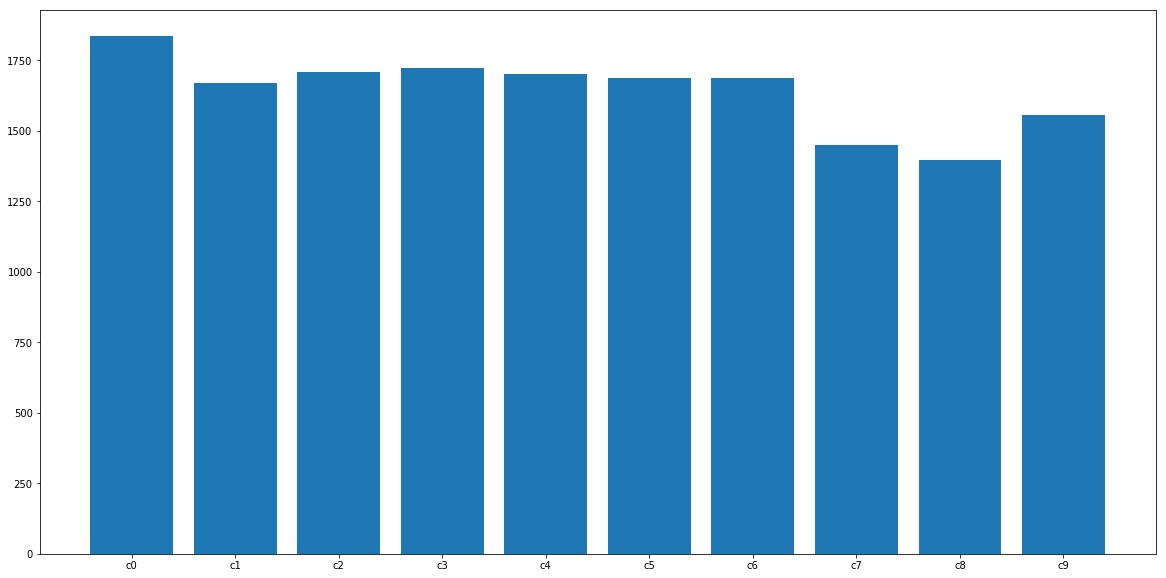

[1836.0, 1669.0, 1707.0, 1722.0, 1703.0, 1688.0, 1686.0, 1448.0, 1396.0, 1556.0]


In [9]:
with tf.Session() as sess:
    test_onehot = tf.one_hot(train_labels,10)
    test_onehot = sess.run(test_onehot)
    
    
def panda_data(label):
    number_list = label
    num_list = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
    plt.figure(figsize=(20,10))
    plt.bar(range(len(number_list)), number_list, tick_label = num_list)
    plt.show()

col = map(sum,zip(*test_onehot))   #按列相加
panda_data(col)
print(col)

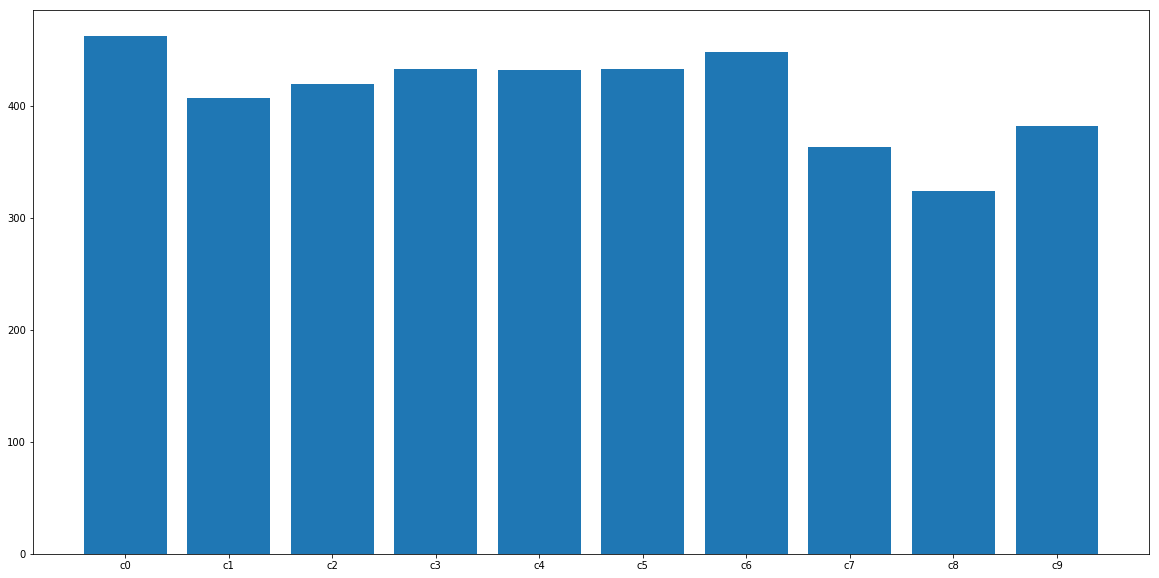

[462.0, 407.0, 419.0, 433.0, 432.0, 433.0, 448.0, 363.0, 324.0, 382.0]


In [10]:
with tf.Session() as sess:
    test_onehot = tf.one_hot(valid_labels,10)
    test_onehot = sess.run(test_onehot)
    
    
def panda_data(label):
    number_list = label
    num_list = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
    plt.figure(figsize=(20,10))
    plt.bar(range(len(number_list)), number_list, tick_label = num_list)
    plt.show()

col = map(sum,zip(*test_onehot))   #按列相加
panda_data(col)
print(col)

使用`tf.data`快速构造读取数据函数



# 读取数据

In [11]:
def read(names, labels, batch_size=None, num_epoch=None, shuffle=False, phase='train'):
    def _read_img(name):
        #TODO
        # 给定图像名称tensor, 输出3维浮点值图像
        content = tf.read_file(name)
        image = tf.image.decode_image(content, channels=3)
        image.set_shape((None, None, 3))
        image = tf.cast(image, dtype=tf.float32)
        
        return image
    
    def _train_preprocess(img):
        #TODO
        # 对训练集图像预处理
        # 例如resize到固定大小,翻转,调整对比度等等
        img_resized = tf.image.resize_images(img, (256, 256))
        
#         im = tf.image.random_flip_left_right(img_resized)
#         im = tf.random_crop(im, [150, 150, 3])
#         im = tf.image.random_brightness(im, max_delta=0.5)
#         im = tf.image.random_contrast(im, lower=0.0, upper=0.5)
#         im = tf.image.random_hue(im, max_delta=0.5)
        
#         img_normed = tf.image.per_image_standardization(im)
        
        return img_resized
    
    def _eval_preprocess(img):
        #TODO
        # 对验证集, 测试集图像预处理
        # 例如resize到固定大小等等
        img_resized = tf.image.resize_images(img, (256, 256))
#         img_normed = tf.image.per_image_standardization(img_resized)
        
        return img_resized
    
    #TODO
    # 构造图像名称 dataset
    name_dataset = tf.data.Dataset.from_tensor_slices(names)
    
    #TODO
    # 通过 map 函数调用 _read_img 构造图像 dataset
    image_dataset = name_dataset.map(_read_img)
    
    if phase == 'train':
        #TODO
        # 通过 map 函数对训练集图像进行处理
        image_dataset = image_dataset.map(_train_preprocess)
    else:
        #TODO
        # 通过 map 函数对验证集,测试集图像进行处理
        image_dataset = image_dataset.map(_eval_preprocess)

    #TODO
    # 构造图像标签 dataset
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    
    #TODO
    # 将图像以及图像标签 dataset 通过 zip 合并成一个 dataset
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    
    #TODO
    # 设置 dataset 的 epoch
    dataset = dataset.repeat(num_epoch)
    
    #TODO
    # 在需要 shuffle 时, 对 dataset 进行 shuffle
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    
    #TODO
    # 在需要进行 batch 时, 对 dataset 进行 batch
    if batch_size is not None:
        dataset = dataset.batch(batch_size)      #顺序很重要
    
    #TODO
    # 构造 dataset 的迭代器
    iterator = dataset.make_one_shot_iterator()

    #TODO
    # 获取 dataset 的元素
    image, label = iterator.get_next()

    return image, label

In [12]:
import sys 
sys.executable

'/home/weijia.wu/anaconda2/bin/python'

In [13]:
batch_size = 10
train_images, train_labels = read(train_names, train_labels, batch_size=batch_size, shuffle=True, phase='train')
valid_images, valid_labels = read(valid_names, valid_labels, batch_size=batch_size, shuffle=False, phase='valid')

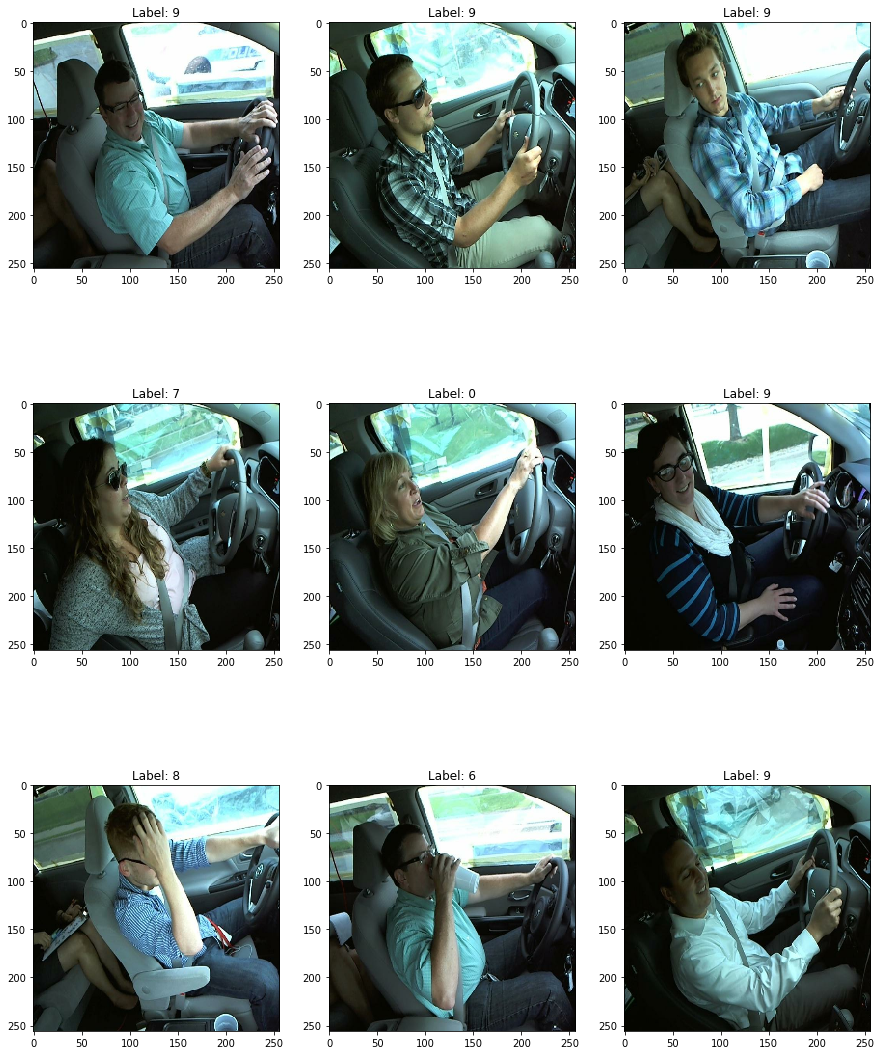

In [14]:
# 测试
# =========这里不要修改=========
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (15.0 , 8.0) #调整显示大小
plt.figure()
plt.subplots_adjust(wspace = None,hspace = None,top = 2)
with tf.Session() as sess:
    img_fetch, label_fetch = sess.run([train_images, train_labels])
    assert img_fetch.ndim == 4, '图像维数 != 4'
    assert label_fetch.ndim == 1, '标签维数 != 1'
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(np.uint8(img_fetch[i+1]))
        plt.title('Label: %d' % label_fetch[i+1])

## 构建模型

读取数据完成后, 我们需要使用 CNN 构建从图像到预测 label 的模型, 可以自己构造模型, 也可以使用`TF-Slim`中预置的模型函数来构造, 第二种方式的好处是我们可以使用在 imagenet 比赛中训练好的与训练模型, 也就是之前提到的 fine-tune 策略.

两种方式都可以, 下面你将可以使用自己的方式去构造这个分类模型

In [15]:
from tensorflow.contrib.slim.python.slim.nets import resnet_v2

In [16]:
def model(inputs, num_classes, is_training=False, scope='model', reuse=None):
    '''
    function to build forward model.
    
    Arguments:
      inputs: 4维输入图像tensor.
              
      num_classes: 分类数.
                   
      is_training: 对使用 BN 层的神经网络非常有用, 你可以使用它或者不使用.
                   
      scope: 变量域的名称.
             
      reuse: 是否需要重用该变量域下的变量.
      
    Return:
      output: 预测模型在使用最后一个 softmax 或者 sigmoid 之前的输出.
    '''
    #TODO
    # 构造你自己的预测模型
    
    with slim.arg_scope(resnet_v2.resnet_arg_scope(weight_decay=0.0005)):
        logits, endpts = resnet_v2.resnet_v2_50(inputs, num_classes, is_training=is_training, reuse=reuse, scope=scope)
    output = tf.squeeze(logits, [1, 2], name='Output')    #Removes dimensions of size 1 from the shape of a tensor. 
    
    return output

In [17]:
train_images

<tf.Tensor 'IteratorGetNext:0' shape=(?, 256, 256, 3) dtype=float32>

# 正则化

In [18]:
with slim.arg_scope([slim.conv2d], activation_fn=tf.nn.relu, normalizer_fn=slim.batch_norm):
    with slim.arg_scope([slim.conv2d, slim.fully_connected], weights_regularizer = slim.regularizers.l2_regularizer(1e-3)) as sc:
        conv_scope = sc

In [19]:
is_training = tf.placeholder(tf.bool, name='is_training')

with slim.arg_scope(conv_scope):
    train_out = model(train_images, num_classes=10, is_training=is_training)
    valid_out = model(valid_images, num_classes=10, is_training=is_training, reuse=True)

In [20]:
train_out
valid_out

<tf.Tensor 'Output_1:0' shape=(?, 10) dtype=float32>

### 构建 loss 函数,计算正确率和构造优化算法

In [50]:
#TODO
# 计算 loss
from tensorflow.python.ops import math_ops

train_loss = tf.losses.sparse_softmax_cross_entropy(train_labels, train_out)
valid_loss = tf.losses.sparse_softmax_cross_entropy(valid_labels, valid_out)


train_labels1 = tf.one_hot(train_labels, 10)
valid_labels1 = tf.one_hot(valid_labels, 10)

train_out1 = tf.nn.softmax(train_out)
valid_out1 = tf.nn.softmax(valid_out)

train_log_loss = log_loss(train_labels1, train_out1)
valid_log_loss = log_loss(train_labels1, valid_out1)


# train_log_loss = tf.losses.log_loss(train_labels, train_out1)
# valid_log_loss = tf.losses.log_loss(valid_labels, valid_out1)

?


TypeError: 'Dimension' object is not iterable

In [49]:
print(train_labels.shape[0]
     )
print(train_labels[0],train_labels[1])

?
Tensor("strided_slice_8:0", shape=(), dtype=int32) Tensor("strided_slice_9:0", shape=(), dtype=int32)


In [48]:
def log_loss(labels, predictions, weights=1.0, epsilon=1e-7, scope=None):
    if labels is None:
        raise ValueError("labels must not be None.")
    if predictions is None:
        raise ValueError("predictions must not be None.")
        
    predictions = math_ops.to_float(predictions)
    labels = math_ops.to_float(labels)
    predictions.get_shape().assert_is_compatible_with(labels.get_shape())
    sum_loss = 0
    print(labels.shape[0])
    for i in labels.shape[0]:
        losses = -np.sum(math_ops.multiply(labels[i],math_ops.log(predictions[i] + epsilon)))
        sum_loss = losses + sum_loss
#             losses = -math_ops.multiply(labels[0],math_ops.log(predictions[0] + epsilon)) 
#                      -math_ops.multiply(labels[1],math_ops.log(predictions[1] + epsilon))
#                      -math_ops.multiply(labels[2],math_ops.log(predictions[2] + epsilon))
#                      -math_ops.multiply(labels[3],math_ops.log(predictions[3] + epsilon))
#                      -math_ops.multiply(labels[4],math_ops.log(predictions[4] + epsilon))
#                      -math_ops.multiply(labels[5],math_ops.log(predictions[5] + epsilon))
#                      -math_ops.multiply(labels[6],math_ops.log(predictions[6] + epsilon))
#                      -math_ops.multiply(labels[7],math_ops.log(predictions[7] + epsilon))
#                      -math_ops.multiply(labels[8],math_ops.log(predictions[8] + epsilon))
#                      -math_ops.multiply(labels[9],math_ops.log(predictions[9] + epsilon))

    return sum_loss / labels.shape[0]

In [22]:
#TODO
# 计算概率

train_prob = tf.nn.softmax(train_out)
valid_prob = tf.nn.softmax(valid_out)

In [23]:
#TODO
# 计算 accuracy

train_acc = tf.reduce_mean(tf.cast(tf.equal(train_labels, tf.argmax(train_prob, axis=-1, output_type=tf.int32)), dtype=tf.float32))
valid_acc = tf.reduce_mean(tf.cast(tf.equal(valid_labels, tf.argmax(valid_prob, axis=-1, output_type=tf.int32)), dtype=tf.float32))

In [24]:
#TODO
# 定义优化方法

opt = tf.train.AdamOptimizer(0.001, 0.9)

#TODO
# 得到所有 bn 更新算子

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

#TODO
# 构造训练方法

with tf.control_dependencies(update_ops):
    train_op = opt.minimize(train_loss)

In [25]:
# 测试
# =========这里不要修改=========

grads = tf.gradients(train_loss, tf.trainable_variables())
assert None not in grads, 'loss 对某参数不可微分'

# 开始训练

In [27]:
# 训练的 epochs 数目
max_epoch = 50
def train(train_log_loss,train_op, train_loss, train_acc, max_epoch,is_training=None, valid_loss=None, valid_acc=None,save_path=None, pretrained_model=None):
    '''
    训练函数.
    
    Arguments:
      train_op: 训练 op
      
      train_loss: 作用在训练集上的 loss
      
      train_acc: 作用在训练集上的 accuracy
      
      max_epoch: 训练最大步长
      
      is_training: 使用 BN 层时的 placeholder
      
      valid_loss: 作用在验证集上的 loss
      
      valid_acc: 作用在验证集上的 accuracy
      
      save_path: 希望保存的模型路径
      
      pretrained_model: 希望使用的与训练模型路径
    '''
    # 开始训练
    freq_print = NUM_EXAMPLES_OF_TRAIN // 10   #2000
    
    log_dir = 'log'

    if pretrained_model is not None:
        #TODO
        # 找到所有需要 finetune 的变量
        vars_to_finetune = {}

        for var in tf.model_variables():   # Returns all variables in the MODEL_VARIABLES collection.
            if 'logit' not in var.op.name:
                var_name_in_ckpt = var.op.name.replace('model', 'resnet_v2_50')   # 将checkpoint文件中的变量名映射到图中的每个变量的字典
                vars_to_finetune[var_name_in_ckpt] = var

        vars_to_init = filter(lambda var: var not in vars_to_finetune.values(), tf.global_variables())
        
        #TODO
        # 生成一个对上面变量的加载器
        restorer = tf.train.Saver(vars_to_finetune)
    
    if save_path is not None:
        saver = tf.train.Saver()
        
    print('sessing....')
    sess = tf.Session()
    
    graph_writer = tf.summary.FileWriter(log_dir, graph=sess.graph)
    
    if pretrained_model is not None:
        #TODO
        # 使用加载器恢复变量的数值,并初始化其他变量
        sess.run(tf.variables_initializer(vars_to_init))
        restorer.restore(sess, pretrained_model)
    else:
        #TODO
        # 初始化所有变量
        sess.run(tf.global_variables_initializer())
        
    
    
    curr_epoch = 0
    curr_step = 0
    curr_valid_step = 0

    running_loss = 0
    running_acc = 0

    metric_log = dict()
    metric_log['train_loss'] = list()
    metric_log['train_acc'] = list()
    metric_log['valid_loss'] = list()
    metric_log['valid_acc'] = list()
    print('train....')
    while curr_epoch < max_epoch:
        if is_training is not None:
            # TODO
            # 运行训练 op 前, 对 bool 型占位符 is_training 进行赋值
            train_feed_dict = {is_training: True}

            # TODO
            # 运行训练 op, 同时输出当前训练 batch 上的 loss 和 accuracy
#             print(curr_step)
            _, batch_loss, batch_acc = sess.run([train_op, train_loss, train_acc], feed_dict=train_feed_dict)
            train_log = sess.run([train_log_loss],feed_dict=train_feed_dict)
        else:
            #TODO
            # 运行训练 op, 同时输出当前训练 batch 上的 loss 和 accuracy
            
            _, batch_loss, batch_acc = sess.run([train_op,train_loss, train_acc])
        
        running_loss += batch_loss
        running_acc += batch_acc
        
        curr_step += batch_size
        
        if curr_step // freq_print > (curr_step - batch_size) // freq_print:
            print('[{}]/[{}], train loss: {:.3f}, train acc: {:.3f}'.format(
                curr_step, NUM_EXAMPLES_OF_TRAIN, (running_loss / curr_step) * batch_size, 
                (running_acc / curr_step) * batch_size))
            print(train_log)
#             print('[{}]/[{}], train loss: {:.3f}, train acc: {:.3f}'.format(curr_step,NUM_EXAMPLES_OF_TRAIN,batch_loss,batch_acc))
        if curr_step > NUM_EXAMPLES_OF_TRAIN:
            # 当前 epoch 结束
            curr_epoch += 1
            metric_log['train_loss'].append(running_loss / curr_step * batch_size)
            metric_log['train_acc'].append(running_acc / curr_step * batch_size)
            
            if (valid_loss is not None and valid_acc is not None):
                running_loss = 0
                running_acc = 0
                
                if is_training is not None:
                    # 使用 BN
                    # TODO
                    # 计算验证集上所有样本的 loss 和 accuracy, 对 bool 型占位符 is_training 进行赋值
                    eval_feed_dict = {is_training: False}
                    
                   
                    
                    
                    while curr_valid_step < NUM_EXAMPLES_OF_VALID:
                        # TODO
                        # 输出当前验证 batch 上的 loss 和 accuracy

                        batch_loss, batch_acc = sess.run([valid_loss,valid_acc], feed_dict={is_training: False})
                        
                        running_loss += batch_loss
                        running_acc += batch_acc
                        curr_valid_step += batch_size
                else:
                    # 不使用 BN
                    # TODO
                    # 计算验证集上所有样本的 loss 和 accuracy, 对 bool 型占位符 is_training 进行赋值
                    
                    while curr_valid_step < NUM_EXAMPLES_OF_VALID:
                        # TODO
                        # 输出当前验证 batch 上的 loss 和 accuracy
                        batch_loss, batch_acc = sess.run([valid_loss, valid_acc])
                        
                        running_loss += batch_loss
                        running_acc += batch_acc
                        curr_valid_step += batch_size

                metric_log['valid_loss'].append(running_loss / curr_valid_step * batch_size)
                metric_log['valid_acc'].append(running_acc / curr_valid_step * batch_size)

                curr_valid_step = curr_valid_step % NUM_EXAMPLES_OF_VALID

                print_str = 'epoch: {}, train loss: {:.3f}, train acc: {:.3f}, valid loss: {:.3f}, valid acc: {:.3f}'.format(
            curr_epoch, metric_log['train_loss'][-1], metric_log['train_acc'][-1], 
            metric_log['valid_loss'][-1], metric_log['valid_acc'][-1])

            else:
                print_str = 'epoch: {}, train loss: {:.3f}, train acc: {:.3f}'.format(curr_epoch, 
                                metric_log['train_loss'][-1], metric_log['train_acc'][-1])

            print(print_str)
            print()

            curr_step = curr_step % NUM_EXAMPLES_OF_TRAIN 
            running_loss = 0
            running_acc = 0
            
    
    # =======不要修改这里的内容========
    # 保存模型
    if save_path is not None:
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        saved_path = saver.save(sess, '%s/model.ckpt' % save_path)
        print('model saved to %s' % saved_path)
        
    sess.close()
    
    # 可视化
    if valid_loss is not None and valid_acc is not None:
        nrows = 2
        ncols = 2
        figsize = (10, 10)
        _, figs = plt.subplots(nrows, ncols, figsize=figsize)
        figs[0, 0].plot(metric_log['train_loss'])
        figs[0, 0].axes.set_xlabel('train loss')
        figs[0, 1].plot(metric_log['train_acc'])
        figs[0, 1].axes.set_xlabel('train acc')
        figs[1, 0].plot(metric_log['valid_loss'])
        figs[1, 0].axes.set_xlabel('valid loss')
        figs[1, 1].plot(metric_log['valid_acc'])
        figs[1, 1].axes.set_xlabel('valid acc')
    else:
        nrows = 1
        ncols = 2
        figsize= (10, 5)
        _, figs = plt.subplots(nrows, ncols, figsize=figsize)
        figs[0].plot(metric_log['train_loss'])
        figs[0].axes.set_xlabel('train loss')
        figs[1].plot(metric_log['train_acc'])
        figs[1].axes.set_xlabel('train acc')

In [28]:
train(train_log_loss,train_op, train_loss, train_acc,40, is_training, valid_loss, valid_acc, save_path='/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/tmp', pretrained_model='/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/resnet_v2_50_2017_04_14/resnet_v2_50.ckpt')

sessing....
INFO:tensorflow:Restoring parameters from /home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/resnet_v2_50_2017_04_14/resnet_v2_50.ckpt
train....
[1650]/[16411], train loss: 1.739, train acc: 0.390
[nan]
[3290]/[16411], train loss: 1.224, train acc: 0.579
[nan]
[4930]/[16411], train loss: 0.990, train acc: 0.663
[nan]
[6570]/[16411], train loss: 0.822, train acc: 0.726
[nan]
[8210]/[16411], train loss: 0.708, train acc: 0.764
[nan]
[9850]/[16411], train loss: 0.631, train acc: 0.792
[nan]
[11490]/[16411], train loss: 0.569, train acc: 0.814
[nan]
[13130]/[16411], train loss: 0.521, train acc: 0.831
[nan]
[14770]/[16411], train loss: 0.485, train acc: 0.844
[nan]
[16410]/[16411], train loss: 0.452, train acc: 0.854
[nan]
epoch: 1, train loss: 0.452, train acc: 0.854, valid loss: 0.831, valid acc: 0.804

[1649]/[16411], train loss: 0.128, train acc: 0.955
[nan]
[3289]/[16411], train loss: 0.135, train acc: 0.958
[nan]
[4929]/[16411], train loss: 0.120, tra

KeyboardInterrupt: 

# 预测测试集

In [30]:
import pandas as pd 
import os
import numpy as np



# 读取测试集

In [29]:
def read_test(data_dir, batch_size=1):
    def _read_img(name):
        content = tf.read_file(name)
        image = tf.image.decode_image(content,channels=3)
        image.set_shape((None,None,3))
        image = tf.cast(image,dtype=tf.float32)
        return image
    
    def normalize(img):
        img_resized = tf.image.resize_images(img,(256,256))
#         img_normed = tf.image.per_image_standardization(img_resized)
        return img_resized
    
    names = os.listdir(data_dir)
    full_names = [os.path.join(data_dir, name) for name in names]
    
    name_dataset = tf.data.Dataset.from_tensor_slices(names)
    img_name_dataset = tf.data.Dataset.from_tensor_slices(full_names)
    
    image_dataset = img_name_dataset.map(_read_img)
    image_dataset = image_dataset.map(normalize)
    
    dataset = tf.data.Dataset.zip((name_dataset,image_dataset))
    
    dataset = dataset.repeat(1)
    
    if batch_size is not None:
        dataset = dataset.batch(batch_size)
        
    iterator = dataset.make_one_shot_iterator()
    
    name, image = iterator.get_next()
    
    return name,image


# 测试数据集

In [31]:
def predict_result(test_img,test_names,model_path,model_fn):
    
    img_id = list()
    prob_result = list()
    
    test_out = model_fn(test_img, 10, is_training = False)
    
    test_prob = tf.nn.softmax(test_out)
    test_pred = tf.argmax(test_prob,axis=-1)
    test_onehot = tf.one_hot(test_pred, 10)
    
    saver = tf.train.Saver()
    
    sess = tf.Session()
    saver.restore(sess, model_path)
    
    try: 
        ind = 0
        while True:
            name, pred = sess.run([test_names, test_onehot])
            img_id.append(name)
            prob_result.append(pred)
            ind+=pred.shape[0]
            if ind % 1000 == 0:
                
                print('%d done!' % ind)
                
    except tf.errors.OutOfRangeError:
        pass
    
    prob_result = np.concatenate(prob_result, axis=0)   # 拼接
    img_id = np.concatenate(img_id, axis=0)[:, None]
    all_data = np.concatenate((img_id, prob_result), axis=1)
    submission = pd.DataFrame(all_data)
    
#     sess.close()
    return submission,img_id,prob_result

In [32]:
test_name,test_images = read_test('/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/')

In [33]:
import os 
name = os.listdir('/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/')
len(name)

79726

In [34]:
tf.reset_default_graph()

In [35]:
test_name,test_images = read_test('/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/')
submission,img_id,predict_result = predict_result(test_images,test_name,'/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/tmp/model.ckpt',model)

INFO:tensorflow:Restoring parameters from /home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/tmp/model.ckpt
1000 done!
2000 done!
3000 done!
4000 done!
5000 done!
6000 done!
7000 done!
8000 done!
9000 done!
10000 done!
11000 done!
12000 done!
13000 done!
14000 done!
15000 done!
16000 done!
17000 done!
18000 done!
19000 done!
20000 done!
21000 done!
22000 done!
23000 done!
24000 done!
25000 done!
26000 done!
27000 done!
28000 done!
29000 done!
30000 done!
31000 done!
32000 done!
33000 done!
34000 done!
35000 done!
36000 done!
37000 done!
38000 done!
39000 done!
40000 done!
41000 done!
42000 done!
43000 done!
44000 done!
45000 done!
46000 done!
47000 done!
48000 done!
49000 done!
50000 done!
51000 done!
52000 done!
53000 done!
54000 done!
55000 done!
56000 done!
57000 done!
58000 done!
59000 done!
60000 done!
61000 done!
62000 done!
63000 done!
64000 done!
65000 done!
66000 done!
67000 done!
68000 done!
69000 done!
70000 done!
71000 done!
72000 done!
73000 done!
7400

In [36]:
predict_result
prob_result =tf.argmax(predict_result,axis=1)
with tf.Session() as sess:
    prob_result = sess.run(prob_result)
for i in prob_result:
    print(i)

5
1
7
0
5
0
4
7
4
0
0
2
4
9
3
1
3
4
0
3
3
7
4
7
1
6
5
9
6
9
6
7
1
4
2
2
1
8
6
9
1
7
9
3
7
1
1
9
0
8
1
2
6
3
8
1
5
3
6
0
3
4
8
2
0
9
3
6
4
8
3
8
3
9
5
4
7
0
6
3
3
7
1
1
7
0
0
8
9
0
3
0
5
0
9
1
4
8
6
1
2
4
6
5
7
6
5
6
6
3
6
1
9
0
2
3
2
6
5
7
2
5
3
9
8
1
8
3
8
4
7
1
4
3
6
2
6
1
5
2
3
5
6
3
8
1
5
7
1
9
0
5
9
2
4
1
1
9
0
7
2
1
9
4
4
6
2
2
2
9
6
8
9
8
0
6
3
5
5
3
5
2
7
5
9
3
9
8
1
7
8
3
4
2
3
4
4
1
2
9
0
0
7
8
3
9
4
5
3
3
7
8
5
7
0
4
8
5
7
6
4
2
0
3
7
9
5
9
9
9
5
2
1
3
2
4
4
1
9
7
1
0
3
3
5
2
0
4
7
8
1
0
4
3
3
9
5
1
5
9
8
1
8
4
7
4
3
5
5
7
7
2
1
0
3
9
3
4
5
2
3
3
5
9
1
3
8
3
1
3
4
9
3
2
4
8
9
3
5
5
9
4
0
0
5
6
7
0
5
9
0
3
5
5
1
2
5
4
8
9
1
1
1
9
2
9
1
7
6
4
0
3
8
2
3
3
3
2
0
6
7
0
6
0
5
7
4
4
4
4
9
6
7
8
9
5
6
5
3
9
4
9
3
0
5
3
2
8
7
8
9
5
0
8
2
5
6
0
3
3
8
5
8
9
0
8
9
6
2
5
1
1
3
4
5
2
1
5
8
8
4
5
3
2
8
9
4
2
8
2
9
5
3
5
0
9
9
2
5
5
4
9
2
2
1
9
9
0
1
1
4
9
8
0
8
4
4
6
6
9
1
4
5
1
5
9
6
7
9
1
6
7
6
2
3
7
9
4
4
0
0
0
2
6
3
9
6
6
9
5
9
4
1
5
3
1
5
3
9
5
8
9
1
5
8
8
4
6
3
8
7
4
0
4
4
5
1
9
2
9


2
5
1
7
2
5
2
6
0
6
2
3
6
0
1
0
4
9
4
9
4
6
9
4
6
6
6
6
5
4
7
5
1
8
6
7
6
0
3
8
3
1
2
5
1
4
6
5
5
1
0
5
5
8
2
4
9
4
8
8
3
6
5
8
6
3
1
3
3
2
2
2
0
7
0
7
8
9
8
8
2
7
6
7
4
0
2
5
5
4
4
9
8
1
3
7
7
4
6
1
1
5
7
5
5
6
4
7
7
1
9
1
0
6
6
9
0
7
6
5
3
0
6
8
3
0
2
8
0
6
3
3
2
4
7
7
4
8
7
9
7
8
1
3
5
8
9
8
4
6
3
6
4
0
5
3
2
8
9
6
2
8
1
6
8
5
2
1
9
3
4
0
7
0
0
3
5
8
4
8
6
1
0
8
8
5
1
7
6
7
9
9
8
2
7
1
7
5
9
3
1
3
6
1
9
7
9
1
6
0
9
4
6
3
2
7
6
1
3
2
7
2
1
9
6
8
2
1
2
3
7
9
9
9
3
7
3
0
9
3
4
5
4
1
1
9
9
0
6
1
9
3
4
5
4
2
3
4
2
5
0
0
0
8
8
4
9
3
1
8
3
4
7
5
3
6
0
5
4
8
2
5
7
4
2
6
6
9
1
9
1
1
9
7
3
6
7
9
5
9
9
2
3
6
8
5
6
8
9
1
1
5
6
4
2
9
7
7
1
8
3
3
6
1
9
5
1
3
7
5
0
2
3
8
2
1
6
3
9
8
7
8
2
5
3
2
2
8
9
3
8
4
7
0
4
9
8
1
4
0
7
9
0
2
1
1
3
0
0
7
8
1
3
8
6
0
5
3
5
0
3
7
3
9
8
1
6
0
0
9
4
6
9
0
1
4
9
9
2
4
6
9
7
4
7
0
2
3
5
2
8
1
1
3
4
2
8
5
6
4
8
7
4
1
0
6
6
8
2
6
7
8
3
2
1
6
2
4
5
5
6
3
5
5
1
0
7
6
5
8
5
2
4
8
0
5
3
3
9
3
4
5
6
8
2
3
7
9
6
3
8
3
7
4
1
3
5
6
4
6
6
1
5
5
6
5
1
2
0
4
3
5
5
5
9
0
0
2
2
7


5
3
2
6
2
9
8
9
5
4
2
7
4
3
3
8
4
6
3
0
5
7
3
3
4
2
9
8
8
1
8
0
5
7
0
5
1
8
5
1
0
2
5
1
7
6
8
9
1
4
3
2
7
5
2
6
6
2
5
5
0
3
1
2
7
9
7
0
3
9
2
1
4
2
4
9
1
3
3
4
8
3
8
6
6
2
2
6
1
1
3
5
4
1
0
6
7
5
8
4
0
5
0
6
5
6
3
0
1
1
2
4
3
2
3
1
9
8
6
1
1
7
3
4
3
4
1
5
5
0
8
4
2
1
1
4
0
1
4
4
7
7
6
7
9
1
2
8
5
2
6
7
5
3
3
9
1
0
0
0
6
8
3
4
1
0
4
8
3
1
8
5
5
0
4
0
9
7
2
7
3
5
9
8
8
1
9
9
9
5
5
3
7
0
8
5
7
3
6
4
5
8
8
5
2
8
3
3
2
1
0
8
6
8
4
2
2
7
4
4
5
5
1
5
4
7
5
8
7
4
7
7
6
6
5
4
3
9
0
4
6
0
7
0
1
7
8
4
2
0
2
6
9
7
0
9
9
7
8
3
1
2
5
5
3
5
1
9
5
9
5
8
0
7
6
1
6
3
1
1
0
6
5
9
5
4
5
4
0
6
6
5
0
8
6
1
5
4
5
1
5
6
3
1
3
8
8
3
4
7
3
8
7
3
2
8
4
9
2
3
8
4
5
0
5
3
5
1
5
8
9
3
5
8
4
9
4
7
5
2
2
2
2
3
1
2
7
5
7
4
4
2
3
7
7
3
1
9
8
0
5
3
6
1
6
4
5
8
2
5
4
6
6
0
8
5
4
5
5
3
7
0
0
2
8
8
6
4
2
8
3
6
4
8
4
9
8
6
2
3
1
2
1
5
7
6
3
6
8
8
9
3
7
0
4
7
9
1
0
8
5
6
9
7
3
6
1
6
1
8
6
8
8
4
2
0
7
2
0
6
3
5
2
2
3
6
3
9
9
0
5
8
6
2
8
4
6
7
3
6
2
9
4
0
0
3
2
6
2
7
1
6
5
5
3
3
7
3
5
2
2
1
3
1
5
6
6
0
2
7
4
5
7
7
6
1
0
2
2
2


7
1
5
5
4
6
4
0
9
0
3
3
5
4
7
4
8
3
8
2
4
5
3
3
5
1
5
8
6
2
1
6
6
3
5
3
4
3
8
3
2
8
1
6
6
4
1
8
9
5
7
9
1
7
6
5
6
7
9
6
2
1
3
3
9
8
2
4
0
3
0
6
5
5
2
3
8
2
8
0
9
1
4
3
0
2
4
6
4
6
4
0
3
7
5
1
3
3
5
7
7
9
5
2
3
1
6
3
6
5
3
9
6
0
2
0
9
1
7
1
1
1
7
7
4
3
3
4
5
8
7
8
7
8
5
1
4
1
9
4
1
0
2
6
2
7
5
5
9
3
8
9
6
7
9
8
1
8
2
4
7
0
9
3
5
0
8
4
9
7
6
0
8
5
5
1
4
5
2
3
2
0
9
1
7
0
0
3
0
2
0
8
2
2
4
1
9
7
6
9
9
7
9
2
3
8
5
7
6
3
3
5
6
5
4
9
3
6
4
4
6
7
0
8
1
6
0
9
7
2
4
2
4
0
8
4
6
5
5
8
9
8
5
9
4
9
0
1
5
9
5
2
1
6
5
5
8
1
1
4
9
8
2
8
3
6
9
1
4
3
6
5
1
5
0
9
3
9
0
6
4
2
4
7
1
1
3
2
1
5
3
5
3
3
7
6
0
8
6
0
2
3
1
2
0
6
7
9
4
4
3
2
7
7
9
5
7
7
8
5
6
3
1
5
4
3
6
5
7
9
7
1
9
2
1
5
8
7
6
2
6
0
4
7
8
1
7
9
7
5
7
2
3
3
0
3
5
7
4
1
1
1
5
3
8
4
1
6
8
4
3
7
1
6
5
0
6
7
4
3
1
4
6
7
0
7
8
1
2
8
2
4
6
4
1
4
2
8
5
1
2
7
9
2
9
6
3
9
0
1
6
0
6
1
4
0
6
8
8
8
6
5
9
2
4
2
3
3
3
0
1
0
4
1
3
7
6
8
3
9
6
0
1
6
0
4
4
1
6
3
2
7
4
8
2
5
5
6
6
6
1
8
6
3
9
3
7
8
7
6
6
6
6
6
8
4
4
0
0
9
0
5
0
2
2
0
7
9
3
3
9
3
5
3
5
0
5
9
9
2


6
9
3
4
1
4
8
3
3
0
7
6
0
2
2
0
0
5
6
5
0
5
8
4
5
9
4
6
6
7
1
2
2
4
4
6
3
2
7
9
7
8
3
5
9
6
0
9
9
2
7
9
6
8
0
1
1
1
4
8
6
7
6
9
0
8
0
3
5
6
0
3
0
0
4
7
4
4
3
0
8
0
1
3
3
3
9
8
7
6
7
7
0
7
7
5
7
9
9
1
4
1
1
4
1
5
9
0
6
6
0
2
7
7
3
1
3
6
2
7
4
6
6
7
7
5
5
7
4
0
2
1
7
7
8
0
0
4
2
3
3
3
0
7
1
4
7
1
5
3
3
9
6
0
2
6
2
1
6
2
5
4
5
7
0
4
9
5
1
8
3
8
3
3
2
1
5
8
0
9
8
9
5
7
2
8
3
6
6
8
4
6
6
9
2
1
5
3
5
4
9
8
9
3
4
9
5
3
2
3
9
0
6
7
9
4
8
1
7
9
9
4
1
2
6
2
2
8
2
5
1
3
1
2
5
5
7
5
5
8
1
0
7
6
4
8
4
1
7
6
0
7
0
4
2
4
0
0
1
0
9
3
0
7
6
2
5
0
4
7
2
0
9
3
0
2
6
0
5
1
5
9
6
9
8
7
7
0
0
2
6
2
1
8
2
8
3
9
7
3
7
0
2
1
0
8
1
3
8
6
3
6
5
0
6
5
0
9
3
4
9
7
1
9
3
2
6
7
9
3
7
6
5
8
2
3
4
4
8
1
4
7
0
0
0
0
4
4
2
5
2
0
2
4
8
5
1
4
1
5
9
1
6
4
0
3
5
3
3
4
5
5
3
0
4
5
7
9
0
3
0
5
3
2
7
5
4
8
4
7
6
5
5
3
1
6
5
7
6
6
4
5
5
7
4
3
8
5
4
9
9
5
9
0
7
7
6
1
5
3
4
9
8
6
3
7
9
4
7
4
1
8
4
1
4
0
8
3
6
4
7
1
3
8
2
2
3
2
3
6
6
2
3
3
4
1
5
7
2
4
7
5
4
1
2
6
4
1
8
9
1
8
4
9
7
7
0
2
9
3
7
3
3
4
5
2
1
5
3
8
8
3
8
6
8
3
0
8
5
2


0
7
6
9
3
3
0
9
6
3
3
5
0
2
5
5
5
0
8
5
5
2
6
6
3
1
2
7
1
2
5
0
1
5
0
7
2
3
7
7
4
1
2
3
0
3
3
5
8
7
6
6
7
7
6
6
5
1
5
1
1
7
4
4
8
3
0
5
7
4
9
3
7
0
9
2
6
8
8
5
6
8
1
3
4
2
2
3
2
8
3
0
3
2
4
3
0
7
7
7
2
3
6
3
6
2
8
1
8
6
7
3
2
1
7
8
3
3
6
7
1
9
7
1
9
0
5
7
1
3
2
9
9
6
5
0
8
3
0
0
8
5
5
9
1
5
6
0
4
5
4
7
5
2
0
6
0
9
7
4
7
1
9
6
2
1
6
7
4
0
5
1
9
9
9
1
6
6
5
5
6
7
5
7
6
3
3
4
2
0
5
9
8
5
8
6
2
0
7
4
7
0
5
8
8
3
0
9
9
2
7
4
5
5
2
7
3
8
2
2
2
6
8
2
7
5
8
5
7
3
3
2
7
9
5
2
3
2
3
0
5
3
7
8
3
7
9
8
9
7
6
4
8
0
3
3
4
3
1
2
1
8
6
0
3
6
0
5
9
1
6
7
8
7
9
4
0
2
0
3
2
3
9
3
7
0
5
4
7
6
9
7
0
7
1
4
9
5
0
2
7
2
9
2
7
1
7
4
0
1
2
3
6
0
3
6
8
3
6
3
5
9
9
8
7
5
5
6
0
5
0
6
9
5
8
7
7
0
7
0
3
9
6
4
2
5
6
6
1
6
1
5
6
1
2
1
0
0
5
4
5
3
6
6
5
1
7
1
9
7
6
0
5
6
9
6
8
6
4
5
2
3
3
5
5
6
2
7
1
0
6
3
3
7
3
8
0
1
2
6
2
5
3
7
7
8
4
9
9
6
8
6
4
8
1
5
6
4
9
5
2
7
5
8
6
7
5
8
9
5
5
6
8
0
5
2
5
3
9
2
5
5
5
5
0
1
6
7
6
7
0
2
8
7
6
3
1
7
4
2
0
5
8
9
6
3
2
8
1
1
7
0
8
4
0
3
7
2
1
4
5
9
5
3
0
3
9
8
6
1
5
8
5
4
6
1
9
1
4
2


3
6
0
0
5
1
8
2
5
4
8
5
5
2
0
6
0
4
4
0
2
7
0
8
5
0
1
4
6
5
8
0
4
9
0
8
6
0
6
5
1
4
9
6
2
4
7
2
1
5
2
7
8
8
4
9
7
4
1
6
6
1
6
6
8
5
8
7
3
0
8
4
2
1
3
1
3
5
8
4
0
6
7
1
5
9
1
0
8
4
7
5
1
2
0
8
7
8
1
3
8
3
2
6
1
8
7
1
6
2
8
0
7
8
1
0
9
9
9
3
5
0
8
7
7
7
6
4
2
5
4
2
0
1
7
0
2
6
5
2
6
8
5
8
4
0
3
3
4
8
4
1
7
6
7
8
9
4
4
3
0
4
5
2
1
2
9
8
1
0
7
5
7
4
7
4
9
6
4
0
8
6
5
6
6
5
4
7
2
0
4
4
6
5
4
2
2
4
8
3
9
9
3
8
5
4
4
4
0
3
7
9
3
2
8
0
2
0
1
8
1
3
8
1
9
0
5
4
6
9
5
1
4
8
0
4
2
7
6
8
4
7
3
6
2
6
3
7
9
5
7
0
7
4
4
6
3
5
6
0
1
8
9
3
3
4
2
6
9
5
7
2
7
4
9
0
5
3
6
6
0
2
0
5
7
1
8
3
0
6
8
2
4
9
4
5
8
6
6
5
1
1
5
4
2
1
7
9
9
9
8
6
5
1
1
6
2
3
1
4
4
3
8
6
8
4
8
1
2
2
6
8
0
1
6
7
3
6
3
9
3
1
5
2
6
8
0
1
5
3
9
3
3
0
0
0
6
1
2
0
2
7
5
7
0
7
7
0
3
6
7
6
2
0
1
2
9
6
3
1
5
3
0
5
6
0
9
8
0
5
1
5
3
2
0
2
7
1
0
9
1
7
5
7
7
2
9
8
2
8
7
1
2
1
2
5
4
3
3
8
1
5
7
5
8
8
1
8
6
8
2
8
7
3
7
0
8
4
7
5
7
1
9
2
0
7
4
7
1
3
2
5
6
4
4
1
5
0
6
1
3
0
6
3
2
3
1
1
7
6
7
3
0
2
5
3
6
5
0
6
9
9
6
9
9
9
5
5
3
5
1
7
3
5
3
4
4
1
3
9


5
0
5
7
8
3
6
7
2
0
1
1
2
8
5
2
0
4
5
3
6
7
5
7
8
2
0
1
7
7
7
4
3
7
9
8
3
4
1
1
0
2
8
6
0
9
6
9
9
6
5
9
3
6
2
1
3
9
2
7
7
8
3
1
3
9
9
0
0
1
7
6
7
8
6
1
9
3
7
6
5
5
9
8
7
9
0
8
4
8
9
9
3
7
0
0
5
7
3
6
6
6
5
9
9
6
5
0
3
5
3
6
7
3
2
5
6
1
1
1
5
3
5
1
3
5
9
0
5
9
7
6
6
9
9
8
2
7
0
3
7
5
9
1
3
8
0
4
9
4
2
2
6
6
2
2
0
6
2
3
0
6
9
9
6
0
4
4
2
1
9
3
8
2
2
6
5
3
5
0
3
2
3
8
4
4
1
7
6
1
6
6
5
6
4
4
7
6
3
2
5
5
6
3
3
6
6
5
6
8
9
9
3
7
0
6
3
9
6
9
4
9
0
6
0
0
4
9
0
6
4
1
0
3
8
5
0
4
6
8
8
1
7
9
0
4
6
7
0
1
6
7
2
2
1
5
6
2
6
6
6
4
3
9
9
1
4
3
9
2
8
9
6
3
9
9
0
2
3
5
7
9
4
6
4
0
4
4
1
0
0
7
7
6
5
6
6
4
7
9
2
1
6
8
0
8
2
7
7
2
1
6
2
3
5
3
4
3
1
0
0
7
8
5
1
5
6
7
4
2
5
4
6
4
3
4
0
4
3
1
3
4
7
6
3
6
9
0
7
3
7
3
0
3
4
2
7
5
0
4
5
5
1
7
6
5
2
7
7
4
5
6
2
2
6
4
4
7
6
3
7
2
0
5
8
3
7
7
8
7
3
4
5
3
2
7
0
8
1
2
1
9
5
0
3
9
2
3
2
5
9
2
8
1
9
2
5
9
6
9
5
5
4
4
1
1
5
5
1
0
4
4
6
4
6
6
2
7
7
4
5
1
1
4
5
6
7
5
2
4
9
0
9
1
4
3
1
7
0
1
8
7
3
6
9
4
6
8
6
9
6
6
3
9
0
8
5
6
9
4
4
0
6
8
0
2
1
4
1
7
2
6
8
9
1
9
6
9
3
0


5
6
4
8
9
2
6
7
4
1
5
2
7
5
1
4
6
4
7
7
5
6
5
3
7
2
7
8
1
3
5
1
4
1
5
7
9
1
6
0
6
3
7
6
5
2
4
7
9
2
8
1
0
8
3
1
4
3
2
7
6
3
3
5
0
2
5
1
2
1
5
2
1
8
9
8
2
3
7
7
6
6
8
4
4
0
1
6
1
3
5
1
6
8
2
8
2
4
8
4
8
0
2
6
9
4
3
3
7
2
9
5
4
9
5
3
7
9
6
5
1
8
3
7
1
5
6
4
3
9
9
0
5
2
4
2
7
3
6
8
1
0
7
8
1
7
5
6
6
5
4
8
0
6
2
2
0
7
3
4
5
7
9
1
2
4
9
7
8
3
7
2
1
8
7
6
0
8
7
7
1
6
7
0
1
1
0
4
6
6
3
5
5
7
4
6
6
6
8
6
1
8
8
5
2
4
6
1
9
4
0
0
2
9
5
4
4
6
6
9
6
5
8
9
3
2
8
6
8
6
5
6
1
1
3
3
7
8
5
8
6
4
6
6
3
4
7
5
2
7
2
4
0
5
7
4
9
6
3
4
5
6
6
0
7
9
1
1
5
7
2
7
4
5
3
8
0
6
6
3
1
3
4
9
0
0
9
9
2
3
4
6
4
5
0
5
3
6
7
5
3
6
1
4
6
3
2
9
8
9
9
5
2
6
9
1
4
7
4
3
9
5
5
9
4
1
1
8
4
6
1
4
6
3
2
5
4
7
0
7
8
6
8
7
6
5
1
5
5
6
8
3
6
6
3
6
0
4
4
3
3
3
4
4
3
0
8
7
3
7
2
1
4
4
9
2
5
0
0
4
1
8
5
0
2
4
5
5
1
9
3
3
0
6
2
3
2
3
6
5
2
1
9
9
5
9
8
9
8
7
0
1
4
3
3
3
5
2
3
3
3
8
2
9
2
9
8
9
4
4
9
9
5
9
8
5
6
9
0
4
3
1
0
6
0
6
9
4
6
2
9
0
0
3
6
6
8
9
1
6
3
9
4
3
9
8
0
8
8
0
4
8
2
8
4
4
6
9
1
5
9
2
8
2
5
0
4
1
2
6
6
1
5
1
8
1
9
3
9
9


8
2
4
3
2
5
9
5
8
8
6
6
9
7
2
1
6
5
4
5
4
7
3
6
6
5
3
1
0
1
0
5
6
5
3
6
1
7
5
6
1
9
6
5
7
2
7
8
8
2
9
7
9
6
6
5
4
0
8
4
9
8
5
5
3
3
7
2
3
0
1
4
1
3
0
0
8
3
3
1
1
8
7
8
5
9
4
1
0
3
5
1
5
5
7
9
7
6
7
3
3
7
9
0
1
1
8
0
7
3
6
0
1
9
5
7
3
3
8
6
0
1
6
4
1
3
4
6
8
5
3
2
3
4
1
1
3
2
1
6
6
9
4
3
6
1
4
0
1
4
4
7
6
1
3
4
3
0
0
1
7
7
8
7
3
0
6
3
5
4
4
7
4
6
5
7
1
1
1
9
9
2
6
9
2
2
7
3
2
5
1
3
3
3
2
6
3
0
4
4
9
6
2
7
5
4
9
7
9
4
1
2
5
0
7
6
9
3
7
4
7
3
4
3
7
5
7
8
7
2
2
1
2
4
5
6
5
1
5
7
7
6
2
5
2
2
5
1
4
2
9
9
6
9
6
0
8
2
2
0
0
4
6
2
7
4
4
4
0
4
5
8
2
7
9
2
7
7
1
1
7
2
1
7
5
3
9
6
4
2
7
1
2
3
8
2
8
4
5
8
4
1
1
3
7
8
0
0
8
0
8
6
3
2
4
0
5
7
2
5
2
1
6
5
0
8
4
8
0
6
0
9
5
6
3
4
5
7
3
7
3
4
4
4
4
4
5
5
3
8
2
5
9
1
0
3
3
1
1
8
7
8
6
8
4
7
9
5
3
5
1
9
5
4
5
3
9
1
3
6
4
1
9
9
4
3
0
5
3
4
1
7
7
6
6
2
2
9
5
6
1
2
3
2
6
6
7
1
4
8
5
2
6
7
2
6
1
3
9
4
4
5
2
7
3
1
6
3
4
8
6
2
7
7
2
9
6
0
3
0
9
4
4
2
7
7
6
7
6
1
4
6
5
1
8
0
2
8
5
7
7
8
3
3
3
4
3
2
3
5
3
2
8
5
8
0
6
2
0
4
6
3
5
6
3
6
5
0
6
4
3
8
5
2
4
3
1
7
9
0


4
9
7
6
9
0
8
8
5
0
7
0
9
8
4
3
4
9
4
9
1
6
4
5
5
5
0
7
1
6
4
1
3
5
6
7
4
3
0
3
1
3
4
7
2
1
3
9
4
7
2
0
0
7
6
1
7
9
3
1
1
6
3
9
0
8
8
7
9
4
7
9
5
9
1
8
8
4
5
7
5
6
6
1
8
7
4
1
7
2
2
0
4
0
5
8
5
2
4
5
0
4
9
1
7
7
6
1
0
0
6
6
5
4
3
8
3
6
3
1
0
5
2
9
6
4
6
6
7
5
7
9
6
0
1
5
5
3
9
2
1
8
8
6
0
4
9
2
1
6
6
7
9
7
6
6
7
8
0
3
1
0
4
8
3
9
5
4
0
3
1
3
1
9
3
7
2
3
2
3
8
0
7
8
0
7
0
3
1
2
4
6
6
1
9
2
2
2
0
1
0
4
4
4
0
9
5
4
1
4
5
6
1
5
5
9
7
7
5
1
9
9
0
5
9
6
3
7
8
0
2
6
6
4
3
1
6
7
1
5
3
2
3
6
4
8
0
0
8
4
7
6
8
9
4
4
9
1
6
4
7
3
3
8
5
8
3
1
3
7
9
6
6
3
3
4
7
4
3
0
8
8
8
1
2
5
5
2
8
5
4
8
2
2
6
3
3
3
2
7
7
4
2
2
4
7
4
3
1
4
9
6
9
9
3
7
3
4
5
4
3
3
5
8
9
9
0
0
2
0
3
3
3
6
7
0
1
7
5
2
0
3
3
3
4
0
7
3
4
4
1
3
9
0
9
9
2
7
5
0
3
8
6
6
3
4
4
0
2
4
2
0
5
4
5
5
5
3
2
0
3
3
9
7
8
9
4
5
0
3
2
0
9
6
8
5
4
6
6
4
9
5
3
6
6
5
0
6
0
5
0
8
0
8
3
6
3
3
5
6
9
2
2
6
1
5
3
7
7
6
8
8
5
7
8
2
8
4
1
3
7
7
5
5
2
8
7
9
9
3
4
2
1
5
1
8
3
6
4
9
6
1
7
4
1
2
6
9
2
1
5
1
4
7
2
5
4
5
4
7
2
6
5
0
9
6
3
4
7
8
8
3
2
7
3
3
3
5
8
7


9
3
3
9
0
1
8
1
5
0
8
5
3
0
6
9
8
8
4
6
3
6
5
9
3
3
6
4
6
1
5
1
0
0
5
0
5
6
2
6
8
2
5
5
5
2
7
7
3
0
9
8
4
6
6
8
7
4
6
9
5
7
1
2
2
4
6
9
8
9
8
5
1
1
4
4
2
1
3
4
4
4
6
7
6
2
4
4
4
6
9
4
5
2
5
5
9
5
3
3
3
6
4
7
3
3
1
8
1
3
5
1
6
0
3
6
9
3
0
0
9
7
5
6
4
4
3
4
2
8
2
9
6
1
1
9
0
2
3
7
2
1
7
0
7
2
7
1
7
5
6
6
4
4
4
5
2
6
5
4
8
9
1
6
4
3
3
0
1
1
4
3
3
2
1
6
5
3
3
1
4
9
9
5
9
2
2
7
7
4
0
0
5
1
4
2
1
1
4
0
4
6
3
5
7
1
7
8
2
8
3
2
3
0
7
7
2
8
0
8
4
4
1
5
5
7
9
4
6
9
5
6
6
3
3
0
8
8
3
7
3
6
2
5
6
4
2
8
6
9
5
9
1
6
4
1
5
0
6
7
0
7
1
6
1
4
1
4
4
5
4
5
8
1
5
0
3
4
4
5
1
9
6
5
4
0
2
7
4
5
7
4
9
3
7
9
2
0
4
6
1
5
5
6
4
3
2
5
4
3
5
1
8
7
4
1
6
2
2
2
3
4
6
7
0
4
5
5
0
0
5
1
3
4
6
9
7
5
2
2
1
5
4
3
6
1
7
2
6
3
1
3
0
9
5
1
7
2
3
2
4
9
6
7
1
0
3
8
9
9
1
7
5
6
3
6
6
6
7
6
7
5
6
2
7
5
5
8
0
1
1
2
8
1
1
1
3
3
1
0
6
6
6
3
6
2
4
4
8
4
2
0
5
8
8
2
9
7
2
1
4
5
4
2
1
9
2
0
8
1
8
8
6
5
6
6
7
3
7
5
2
9
5
6
5
6
1
8
8
4
9
3
5
6
4
0
8
5
5
6
0
1
2
6
8
8
4
4
6
7
4
5
0
8
6
7
5
5
1
3
8
8
3
1
3
0
9
3
2
1
6
2
7
3
7
0
6
7
0
4


3
9
7
6
2
9
2
0
2
5
9
2
0
2
3
6
3
3
3
9
4
5
7
1
8
0
7
0
6
2
7
8
2
4
1
1
5
1
1
4
1
3
0
7
3
5
2
5
4
6
1
1
5
2
3
3
7
3
1
5
3
3
2
6
8
3
8
6
6
3
6
4
7
4
9
6
5
4
8
6
6
3
7
3
0
1
5
8
4
5
7
8
6
7
2
7
4
8
7
0
9
5
6
4
4
4
5
8
1
5
7
3
0
6
7
5
2
3
3
6
4
6
5
5
5
1
6
9
8
6
6
3
2
5
0
4
1
7
6
9
9
0
7
6
5
4
5
4
7
5
2
0
6
0
4
8
5
2
4
2
8
0
7
5
6
7
9
3
2
7
4
6
0
0
9
3
8
9
4
7
5
1
1
6
9
7
8
0
4
4
1
3
3
1
0
6
8
9
2
0
2
8
6
6
1
5
1
2
6
1
9
1
9
1
8
0
9
7
3
8
1
4
8
6
3
3
7
4
7
4
3
5
9
3
1
2
6
4
6
1
6
4
8
1
9
0
8
1
5
7
0
9
2
1
5
3
3
9
7
6
3
0
0
7
6
4
6
4
3
6
3
1
2
5
7
6
0
5
8
6
5
1
5
1
0
4
2
9
4
1
4
3
9
8
1
0
9
8
3
7
0
3
5
2
9
2
0
9
4
6
4
7
6
0
0
2
5
5
0
2
3
1
1
1
5
1
0
0
9
1
2
4
6
7
9
6
7
7
3
5
2
3
6
0
0
3
4
4
2
9
8
1
3
6
1
3
0
8
7
6
9
6
6
2
8
8
6
0
5
5
3
5
5
2
0
7
4
7
7
9
5
3
4
1
7
9
9
1
1
3
4
1
4
9
0
7
9
6
2
3
2
0
2
3
9
7
3
8
1
6
5
2
8
5
4
7
3
0
2
7
2
8
0
1
9
6
6
2
0
1
2
1
7
4
7
1
6
2
0
9
6
0
8
4
8
0
9
4
8
3
9
4
0
7
9
6
5
8
8
1
8
6
5
7
1
5
9
1
3
6
6
7
5
2
1
1
0
6
5
4
1
2
0
2
3
6
6
9
6
4
2
9
1
0
2
0
4
6
3
3


9
9
6
2
4
3
0
0
4
0
4
2
7
7
5
3
7
4
7
4
9
6
7
1
5
5
9
8
7
9
4
1
9
5
0
4
2
9
2
0
8
9
3
0
5
6
1
2
0
4
2
6
3
3
4
4
5
3
2
5
6
9
2
1
3
0
1
5
1
7
5
0
5
9
9
6
0
5
2
3
8
4
7
7
2
2
1
8
7
1
5
4
8
6
1
6
5
0
8
2
0
6
4
6
0
9
5
2
3
2
5
0
6
8
5
9
3
7
1
4
9
2
1
5
5
1
3
2
3
6
4
7
5
3
0
7
1
5
6
4
2
7
7
7
9
2
7
3
9
8
2
4
4
7
5
7
9
7
2
5
8
0
2
5
7
2
6
7
0
9
6
5
8
0
3
8
3
9
8
0
1
2
9
6
6
3
6
5
7
4
3
7
6
8
5
4
3
7
2
5
7
8
8
2
5
1
8
0
1
2
8
5
2
1
3
3
7
4
3
6
8
8
1
8
4
4
8
1
6
8
1
7
9
6
0
2
3
1
9
9
1
4
7
3
2
6
5
7
1
9
1
7
6
4
6
7
2
3
5
6
4
2
7
4
7
7
4
7
2
5
1
6
9
1
5
9
5
2
3
5
1
0
3
0
4
6
0
1
9
6
2
1
2
3
4
9
4
3
3
6
2
5
9
8
0
3
3
6
8
8
3
0
0
4
4
1
1
4
0
3
3
4
1
8
2
7
4
5
5
7
7
1
2
3
5
7
1
7
9
5
0
0
6
5
3
5
7
9
7
5
7
8
1
4
3
6
3
6
3
6
6
6
4
1
4
2
6
5
7
4
0
1
0
2
7
3
6
5
0
1
7
8
4
3
7
2
7
9
6
3
9
7
4
2
8
4
6
6
9
4
9
3
6
3
8
4
7
2
4
3
3
9
2
9
9
1
5
9
5
6
6
7
0
7
3
1
5
7
1
7
7
7
4
6
8
0
1
8
3
9
6
9
4
7
3
3
0
1
5
4
3
5
0
1
1
1
4
2
4
1
0
8
9
8
4
0
5
2
5
5
1
2
5
7
7
8
7
3
8
1
6
2
5
6
2
0
9
3
6
5
6
7
7
0
5
2
3
4
8
0


3
0
7
6
6
8
9
5
7
4
6
8
5
2
9
8
9
1
1
0
7
7
1
5
9
1
5
5
1
5
9
0
1
0
7
8
7
7
2
1
9
4
7
4
6
4
4
7
2
0
4
2
7
4
5
6
6
9
3
3
4
1
6
8
4
7
6
6
5
1
5
3
4
5
0
0
9
7
5
2
7
9
4
8
6
1
3
0
9
3
5
6
5
3
9
5
5
6
7
5
2
2
5
4
4
0
2
8
3
5
9
7
6
8
3
9
3
2
5
3
3
4
2
2
9
0
8
8
7
1
1
7
2
3
6
2
0
6
7
3
1
7
7
6
5
2
2
0
9
0
6
2
8
1
5
6
0
7
3
6
3
4
5
6
0
0
5
9
3
6
1
5
2
3
6
0
3
5
8
5
5
4
5
6
9
5
5
1
3
5
1
8
0
1
5
0
6
0
6
3
3
0
9
1
2
0
0
3
1
8
7
9
8
6
9
8
9
2
9
8
4
9
4
6
2
8
3
7
6
9
7
1
5
4
9
1
8
5
5
5
4
4
8
4
8
2
2
6
0
9
5
4
7
4
9
1
6
6
1
9
1
8
9
9
6
8
4
1
7
9
4
6
5
3
0
5
6
3
6
6
0
6
9
1
1
6
3
4
6
2
8
9
5
6
3
3
3
0
6
8
6
0
2
3
2
8
8
9
0
5
2
7
5
6
4
1
2
4
3
9
0
6
4
9
9
3
3
4
0
4
2
2
4
9
2
0
7
0
2
5
3
2
1
5
7
1
6
4
7
7
3
2
5
2
8
0
7
7
5
5
4
4
1
5
9
7
7
3
6
7
6
6
2
4
5
8
6
2
4
4
2
9
0
9
0
8
1
6
5
0
5
2
4
4
5
5
8
1
2
6
1
0
5
4
2
3
5
7
1
1
3
4
5
5
3
3
6
3
3
4
9
1
4
4
5
5
6
9
7
5
6
3
9
3
7
5
7
7
6
8
2
3
7
4
6
5
1
6
3
1
3
0
4
0
9
1
0
5
1
7
9
8
3
3
8
2
0
1
3
6
4
6
1
1
9
3
5
6
6
5
3
0
6
0
9
3
4
8
7
0
1
0
4
3
4
3
9
0
6
4


9
6
6
2
7
4
6
0
5
1
1
2
9
8
9
2
8
4
1
8
6
7
2
0
7
2
0
3
6
6
8
4
9
7
5
6
7
6
5
1
0
0
6
7
3
1
0
7
9
9
6
4
6
5
5
1
5
9
3
3
5
6
3
5
8
0
3
5
0
6
3
8
5
5
5
7
7
3
4
5
3
8
6
5
0
5
5
4
7
2
0
5
8
3
0
0
7
5
5
3
5
5
8
8
8
2
0
5
2
6
2
7
3
2
4
8
3
0
1
5
3
3
3
0
3
7
8
4
1
6
4
9
1
6
8
8
1
9
6
5
8
6
1
5
5
4
5
0
1
5
8
7
0
3
1
6
8
6
5
4
3
6
0
7
5
4
3
2
8
9
5
8
5
0
1
9
5
3
8
7
8
1
4
6
8
7
4
8
7
1
3
6
6
1
8
9
3
6
6
0
6
5
6
0
9
8
4
7
6
9
2
1
6
3
7
6
4
0
0
6
9
3
8
4
6
1
1
9
7
1
2
0
8
2
8
5
6
5
1
2
6
5
4
3
1
7
7
5
4
4
1
5
4
6
6
5
2
2
9
6
2
7
3
0
9
5
3
8
6
6
4
1
5
6
7
3
9
0
4
0
5
5
7
8
1
0
7
2
5
3
4
1
5
8
7
7
8
8
6
8
5
8
4
4
3
8
7
9
5
1
3
1
4
7
2
8
5
1
4
7
5
3
2
1
7
0
8
8
2
8
3
1
2
3
3
6
3
4
6
2
7
7
5
1
3
7
5
5
8
1
4
3
6
5
3
1
7
5
6
6
7
4
8
9
4
8
0
7
4
6
3
8
5
4
3
6
3
3
0
2
3
5
3
7
4
8
5
8
0
7
1
5
3
2
3
0
6
3
3
9
6
2
7
2
8
5
6
1
7
6
8
3
8
6
5
4
1
6
1
2
4
7
7
0
0
3
2
0
1
1
9
1
5
5
3
1
6
5
0
5
3
0
2
6
2
8
8
3
0
1
3
9
7
6
3
3
7
4
4
7
4
1
0
7
0
0
7
3
0
5
4
5
5
9
4
0
3
1
1
4
6
7
9
3
8
7
1
7
0
7
7
7
5
7
6
0
2
3
7
4


2
2
5
7
0
5
7
0
5
5
7
6
4
2
3
0
6
0
6
9
8
9
3
7
5
5
0
4
2
5
6
3
4
6
1
5
5
3
0
9
5
7
8
7
9
8
0
6
7
2
3
6
4
0
8
0
1
8
4
8
0
0
0
9
6
9
2
2
6
3
4
0
2
7
6
2
1
6
2
7
7
0
6
0
8
2
5
6
9
3
2
1
7
3
4
1
7
6
6
5
5
4
5
8
3
3
4
5
6
1
7
3
3
9
2
9
3
7
7
1
5
2
5
7
7
3
5
7
6
9
8
3
1
4
9
0
3
9
5
4
4
2
5
1
9
1
1
5
5
5
4
7
6
8
6
9
2
4
9
4
3
8
2
3
2
1
1
6
7
2
6
0
8
5
4
4
7
8
2
8
5
5
1
3
3
0
4
3
2
7
1
3
8
5
7
2
6
9
5
9
6
6
7
8
3
3
1
1
7
8
6
0
3
9
6
4
1
0
2
6
8
8
4
2
7
8
4
6
6
2
1
2
1
6
5
5
3
4
9
7
4
6
6
1
4
7
0
8
8
2
3
4
1
4
7
3
6
4
3
9
7
5
5
5
3
6
6
1
7
6
0
4
1
6
6
1
4
8
4
1
5
4
8
1
2
2
2
3
4
5
5
9
8
6
7
9
8
1
1
8
4
2
2
9
8
5
4
9
2
5
9
0
3
5
3
5
6
1
8
6
2
3
5
4
7
7
5
9
0
3
6
6
9
1
8
3
1
4
0
8
1
7
9
6
0
1
7
3
4
4
5
7
4
0
2
2
9
5
7
6
8
6
8
7
9
0
5
0
0
7
7
5
8
1
9
7
5
3
2
0
3
1
8
6
0
1
9
5
6
2
7
8
9
6
9
9
1
2
3
5
5
1
8
3
1
9
8
4
0
3
2
1
5
4
1
5
6
9
4
8
8
6
1
9
5
7
2
0
3
1
0
2
3
8
0
0
5
4
8
6
6
2
4
4
5
7
8
6
2
2
6
5
3
4
5
8
8
8
1
7
6
2
5
7
7
6
0
6
0
6
3
0
4
8
2
7
8
2
7
5
0
4
8
9
7
4
8
3
5
4
5
9
9
2
7
5
8
5
1
3


/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_13995.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_6204.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_37079.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_30786.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_27133.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_80126.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_50167.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_1527.jpg
/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/img_63347.jpg


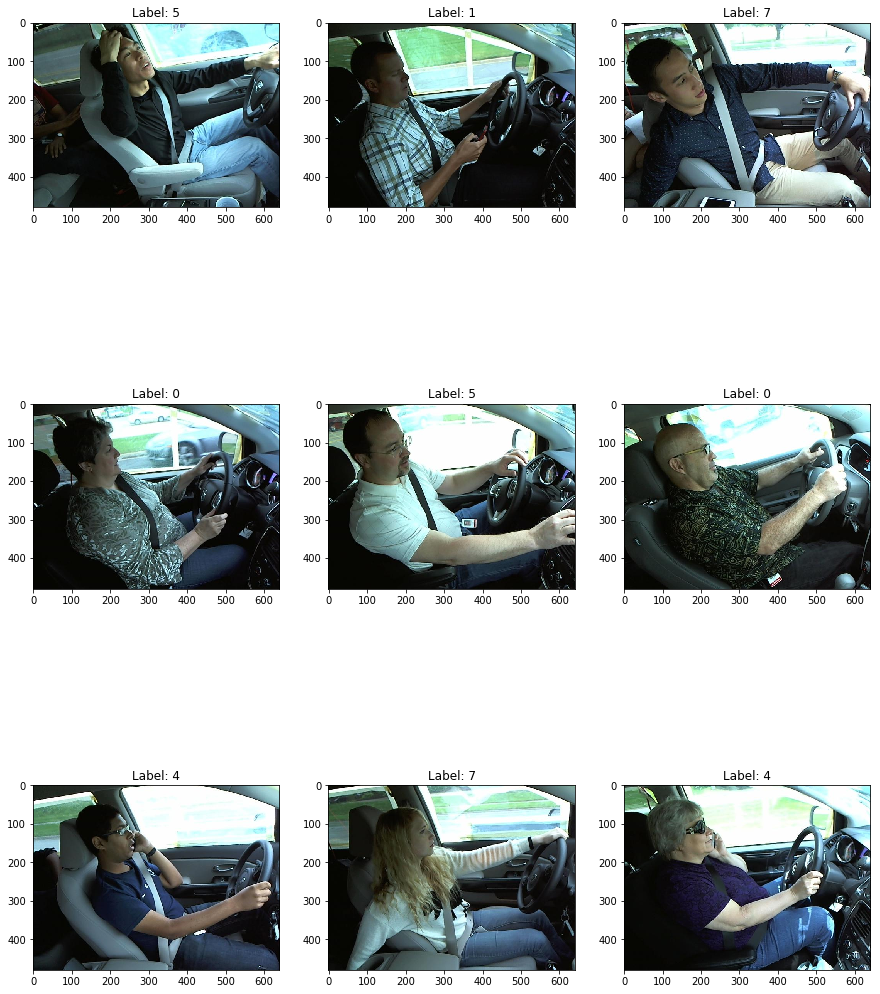

In [37]:
path = r'/home/weijia.wu/workspace/Kaggle/State_farm_distracted_driver_detection/test/'
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pylab
pylab.rcParams['figure.figsize'] = (15.0 , 8.0) #调整显示大小
plt.figure()
plt.subplots_adjust(wspace = None,hspace = None,top = 2)
for i in range(9):
    path_img =path+img_id[i]
    path_img = ''.join(path_img)
    print(path_img)
    img = cv2.imread(path_img)
    
    img = img[...,::-1]
    plt.subplot(3,3,i+1)
    plt.title('Label: %d' % prob_result[i])
    plt.imshow(img)
    
    

In [46]:
import tensorflow.contrib.slim as slim
import tensorflow as tf

In [47]:
idx_to_class = {}
for i in range(10):
    idx_to_class[i] = 'c%d' % i

In [48]:
submission.columns = [['img'] + [i for i in idx_to_class.values()]]

In [49]:
submission.to_csv('./submission.csv', index=False)